In [2]:
#osys = GaubletOpticalSystem(epd=5e-4,npix=512,dimd=5e-4,wavelength=2.2e-6)
#osys.add_optic(efl=5e-4)
#osys.add_distance(distance=4e-4,index=1)
#Qp,prop = osys.propagate()
#gwfr = GaubletWavefront(wavelength=osys.wl,numbeamlets=osys.N,npix=osys.npix,dimension=osys.dimd,proprays=prop,baserays=osys.baserays,Qorig=osys.Q,Qprop=Qp,system = osys.system,P_pram=osys.P_pram)
#Dfield = gwfr.Phasecalc()
#gwfr.display(field=Dfield)
import poppy
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits

c:\users\jaren\miniconda3\lib\site-packages\pysynphot\locations.py:47: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
c:\users\jaren\miniconda3\lib\site-packages\pysynphot\locations.py:346: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
c:\users\jaren\miniconda3\lib\site-packages\pysynphot\refs.py:118: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for http://ssb.stsci.edu/cdbs_open/cdbs\mtab\*_tmg.fits
  'functionality will be SEVERELY crippled. ' + str(e))
c:\users\jaren\miniconda3\lib\site-packages\pysynphot\refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for http://ssb.stsci.edu/cdbs_open/cdbs\mtab\*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


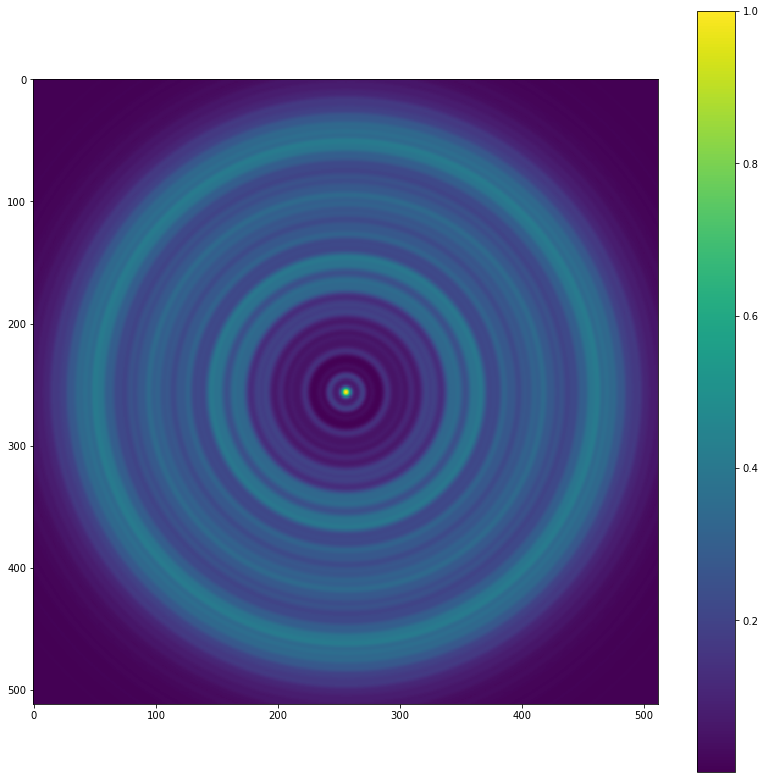

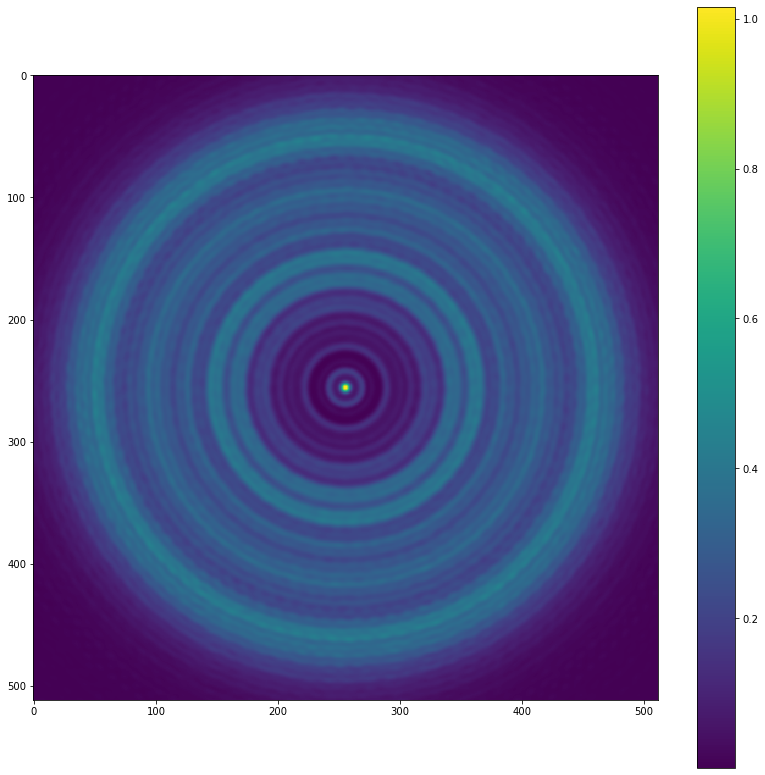

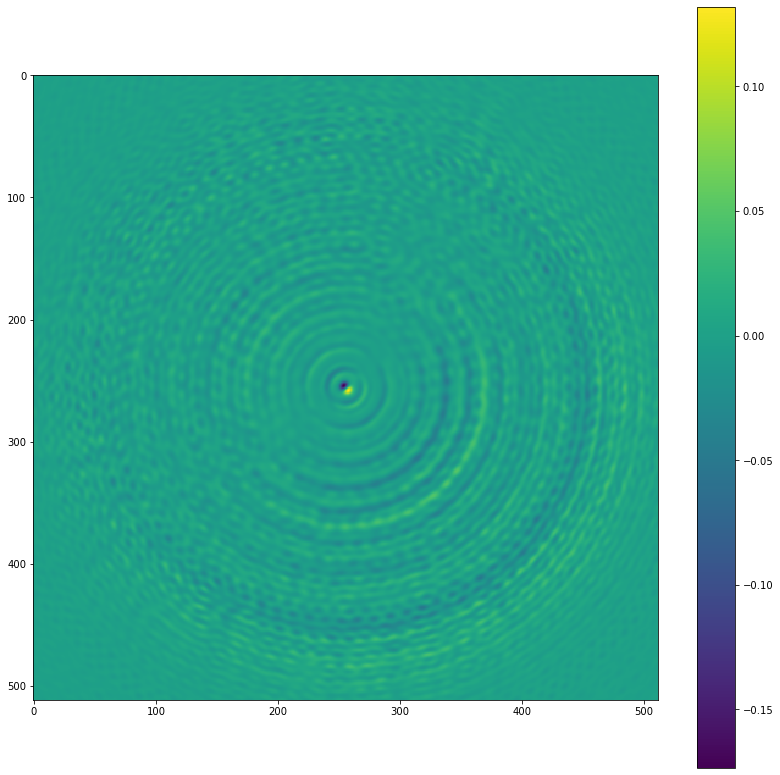

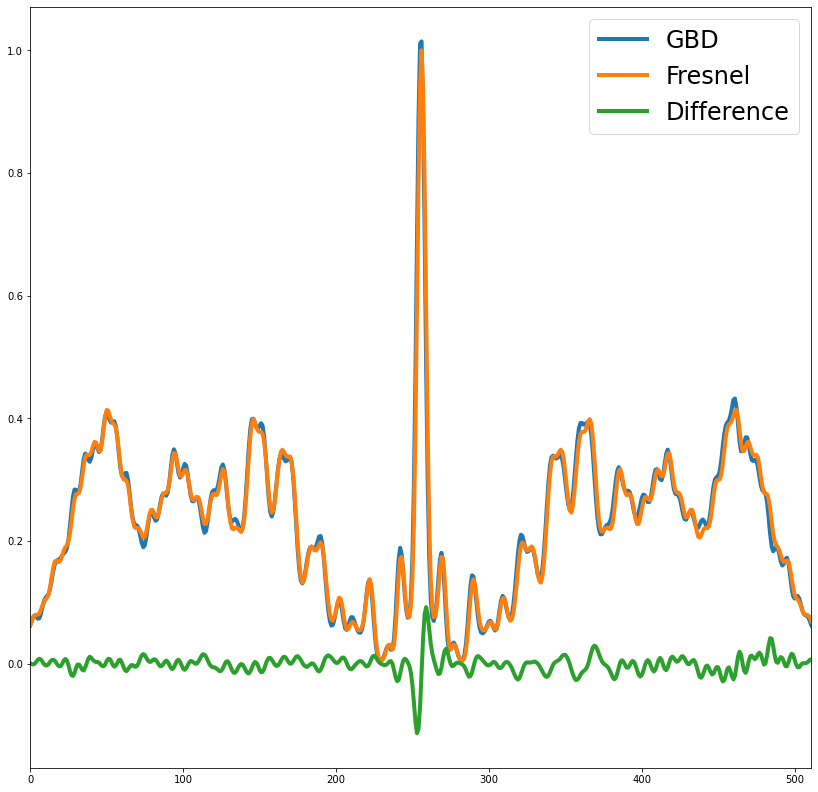

In [8]:
npix = 512
epd = 2.4
fpm = .5
wf = poppy.FresnelWavefront(epd*u.m,wavelength=2200e-9,npix=npix,oversample=4)
osys = poppy.FresnelOpticalSystem(pupil_diameter=epd*u.m)
primary = poppy.CircularAperture(radius=epd/2)
secondary = poppy.InverseTransmission( poppy.CircularAperture(radius=fpm/2) )
aperture = poppy.CompoundAnalyticOptic( opticslist = [primary, secondary] )
osys.add_optic(aperture)
osys.add_detector(pixelscale=(epd/(npix))*u.m/u.pix,fov_pixels=npix,distance=(((epd/2)**2)/(2.2e-6 *20))*u.m)
wfp = osys.propagate(wavefront=wf)


ird = np.abs(wfp.wavefront*np.conj(wfp.wavefront))
ird = ird/np.sum(ird)
scaleby = np.max(ird)
ird = ird/scaleby

plt.figure(figsize=[14,14])
plt.imshow(ird,interpolation='none')
plt.colorbar()
plt.show()

read = np.genfromtxt('2.4_0.5_NF5_Poisson_16706B_1500wo.txt',delimiter=',')
read = (read/np.sum(read))
read = read/scaleby


plt.figure(figsize=[14,14])
plt.imshow((np.abs(read)),interpolation='none')
plt.colorbar()
plt.show()

diff = ird-read

plt.figure(figsize=[14,14])
plt.imshow(diff,interpolation='none')
plt.colorbar()
plt.show()

plt.figure(figsize=[14,14])
plt.plot(read[256,:],label='GBD',linewidth=4)
plt.plot(ird[256,:],label='Fresnel',linewidth=4)
plt.plot(diff[256,:],label='Difference',linewidth=4)
plt.xlim([0,511])
plt.legend(prop={'size': 24})
plt.show()


#wf  = poppy.FresnelWavefront(2.4*u.m,wavelength=2200e-9,npix=512,oversample=1)
#secondary = poppy.InverseTransmission( poppy.CircularAperture(radius=0.5) )
#aperture = poppy.CompoundAnalyticOptic( opticslist = [primary, secondary] )
#img = wf.wavefront
#img = np.log(np.abs(img*np.conj(img)))
#plt.imshow(img)

SyntaxError: EOL while scanning string literal (<ipython-input-43-9c99a0bd3ee5>, line 120)

arcsec =  18.683423861946284


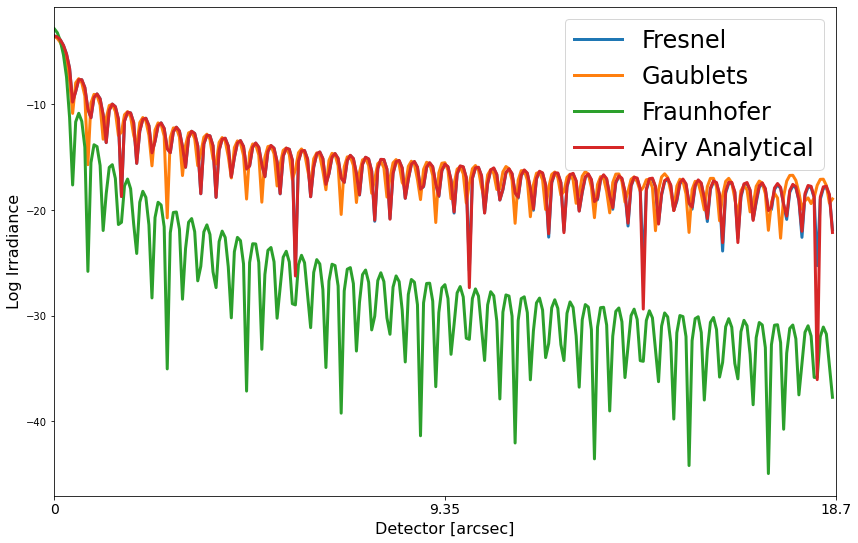

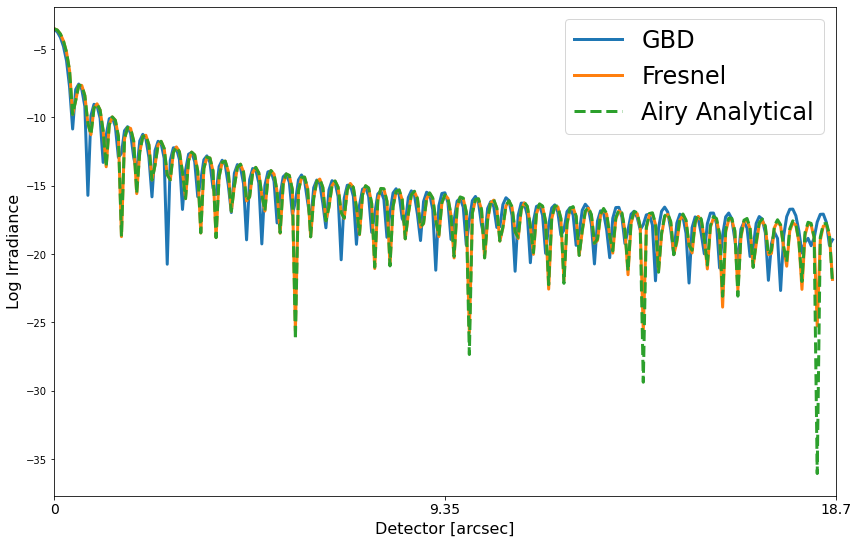

c:\users\jaren\miniconda3\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in log
c:\users\jaren\miniconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in log


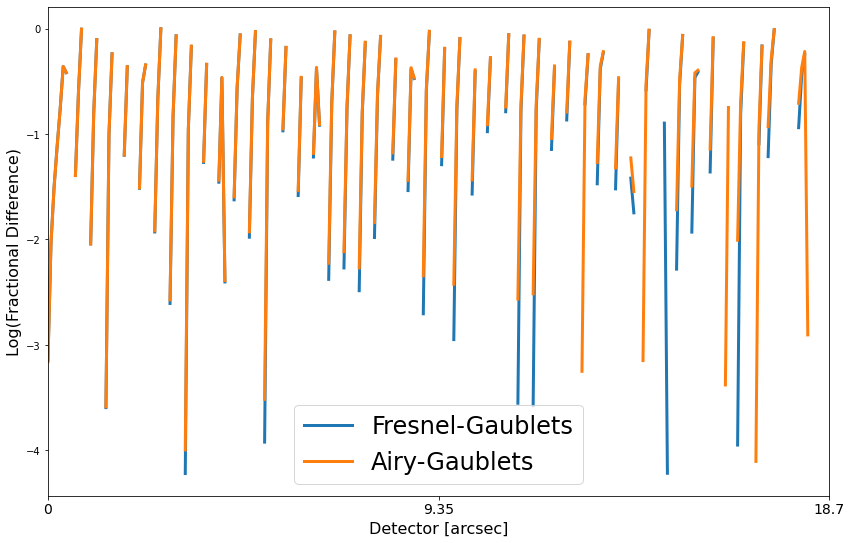

In [5]:
# Read Gaublets
fpsf = np.genfromtxt('17k_hpsfirrad.txt',delimiter=',')

# Fraunhofer Calculations
npix = 512
epd = 2.4
fpm = .5
dimd = 5e-4
oversample=1
asec = np.arctan(dimd/5.52)*206265 # radians to arcseconds
print('arcsec = ',asec)
pixelscale = (asec/(npix))
osys = poppy.OpticalSystem(oversample=oversample)
osys.add_pupil(poppy.CircularAperture(radius=epd/2))
#osys.add_image()
osys.add_detector(pixelscale=pixelscale, fov_arcsec=asec)
psf = osys.calc_psf(wavelength=2.2e-6)
#print(psf[0].data)
fraundata = ((psf[0].data*np.conj(psf[0].data))) # offset logarithm
fraunirf  = np.sum((fraundata))
fraundata = fraundata/fraunirf
#fraundata = fraundata/np.max(fraundata)
fraundata = np.log(fraundata)

# Fresnel Calculations
npix = 512
epd = 2.4
fpm = .5
wf = poppy.FresnelWavefront(epd*u.m,wavelength=2200e-9,npix=npix,oversample=4)
osys = poppy.FresnelOpticalSystem(pupil_diameter=epd*u.m)
primary = poppy.CircularAperture(radius=epd/2)
osys.add_optic(primary)
osys.add_optic(poppy.QuadraticLens(5.52*u.m))
osys.add_detector(pixelscale=(5e-4/(npix))*u.m/u.pix,fov_pixels=npix,distance=5.52*u.m)
wfp = osys.propagate(wavefront=wf)

# Scale Fresnel Calculations
irf = np.abs(wfp.wavefront*np.conj(wfp.wavefront))
intirf = np.sum(np.abs(irf))
irf = irf/intirf
#irf = irf/np.max(irf)
i_irf = irf
irf = np.log(irf)

# Try analytical airy
airy=poppy.misc.airy_2d(diameter=2.4, wavelength=2.2e-6,
                              shape=(512,512), pixelscale=pixelscale,
                             center=(256,256))
airytot = np.sum(airy)
airy = airy/airytot
i_airy = airy
airy = np.log(airy)

# Scale Gaublet Calculations
fpsf = fpsf/np.sum(fpsf)
i_fpsf = fpsf
fpsf = np.log(fpsf)
#fpsf = fpsf/np.max(fpsf)

# plt.figure(figsize=[7,7])
# plt.imshow(fraundata)
# plt.colorbar()
# plt.show()

# # Fresnel Figure
# plt.figure(figsize=[7,7])
# plt.imshow(irf)
# plt.colorbar()
# plt.show()

# # Gaublet Figure
# plt.figure(figsize=[7,7])
# plt.imshow(fpsf)
# plt.colorbar()
# plt.show()

# # Difference PSF
# diffpsf = irf-fpsf
# plt.figure(figsize=[7,7])
# plt.imshow(diffpsf)
# plt.colorbar()
# plt.show()

plt.figure(figsize=[14,9])
#plt.plot(diffpsf[256,256-100:256+100],label='Difference')
plt.plot(irf[256,256:512],label='Fresnel',linewidth=3)
plt.plot(fpsf[256,256:512],label='Gaublets',linewidth=3)
plt.plot(fraundata[256,256:512],label='Fraunhofer',linewidth=3)
plt.plot(airy[256,256:512],label='Airy Analytical',linewidth=3)
plt.xlim([0,256])
plt.legend(prop={'size': 24})
arcsec = str(18.7)
arcse2 = str(18.7/2)
plt.xticks([0,128,256], ['0',arcse2,arcsec],fontsize=14)
plt.xlabel('Detector [arcsec]',fontsize=16)
plt.ylabel('Log Irradiance',fontsize=16)
plt.show()



plt.figure(figsize=[14,9])
#plt.plot(diffpsf[256,256-100:256+100],label='Difference')
plt.plot(fpsf[256,256:512],label='GBD',linewidth=3)
plt.plot(irf[256,256:512],label='Fresnel',linewidth=3)
#plt.plot(fraundata[256,256:512],label='Fraunhofer',linewidth=3)
plt.plot(airy[256,256:512],label='Airy Analytical',linewidth=3,linestyle='--')
plt.xlim([0,256])
plt.legend(prop={'size': 24})
arcsec = str(18.7)
arcse2 = str(18.7/2)
plt.xticks([0,128,256], ['0',arcse2,arcsec],fontsize=14)
plt.xlabel('Detector [arcsec]',fontsize=16)
plt.ylabel('Log Irradiance',fontsize=16)
plt.show()

plt.figure(figsize=[14,9])
plt.plot(np.log((i_irf[256,256:512]-i_fpsf[256,256:512])/(i_irf[256,256:512])),label='Fresnel-Gaublets',linewidth=3)
plt.plot(np.log((i_airy[256,256:512]-i_fpsf[256,256:512])/(i_airy[256,256:512])),label='Airy-Gaublets',linewidth=3)
plt.xlim([0,256])
plt.legend(prop={'size': 24})
arcsec = str(18.7)
arcse2 = str(18.7/2)
plt.xticks([0,128,256], ['0',arcse2,arcsec],fontsize=14)
plt.xlabel('Detector [arcsec]',fontsize=16)
plt.ylabel('Log(Fractional Difference)',fontsize=16)
plt.show()



In [ ]:
%%timeit
# Fresnel Calculations
npix = 512
epd = 1
wf = poppy.FresnelWavefront(epd*u.m,wavelength=2200e-9,npix=npix,oversample=4)
osys = poppy.FresnelOpticalSystem(pupil_diameter=epd*u.m)
primary = poppy.CircularAperture(radius=epd/2)
osys.add_optic(primary)
osys.add_optic(poppy.QuadraticLens(5.52*u.m))
osys.add_detector(pixelscale=(5e-4/(npix))*u.m/u.pix,fov_pixels=npix,distance=5.52*u.m)
wfp = osys.propagate(wavefront=wf)

In [ ]:
wf  = poppy.FresnelWavefront(2.5e-4*u.m,wavelength=2200e-9,npix=1024,oversample=4)
wf *= poppy.CircularAperture(radius=1.25e-4*u.m)

plt.figure(figsize=[12,5])
wf.display('both',colorbar=True, showpadding=True,imagecrop=5e-4)
plt.suptitle("Entrance Pupil", fontsize=18)

wf.propagate_fresnel((2.5e-3 + 16.0*2.2e-6*(1.0)*(10.0**2))*u.m)
plt.figure(figsize=[17,9])
wf.display('both',colorbar=True, showpadding=True,imagecrop=1e-4,scale='log')
plt.suptitle("Propogate to focus", fontsize=18)

In [ ]:
wf.propagate_fresnel(1e-4*u.m)
plt.figure(figsize=[12,5])
wf.display('both',colorbar=True, showpadding=True,imagecrop=5e-4)
plt.suptitle("Propogate 40% of focus", fontsize=18)

In [ ]:
wf.propagate_fresnel(1e-4*u.m)
plt.figure(figsize=[12,5])
wf.display('both',colorbar=True, showpadding=True,imagecrop=5e-4)
plt.suptitle("Propogate 60% of focus", fontsize=18)

In [ ]:
wf.propagate_fresnel(1e-4*u.m)
plt.figure(figsize=[12,5])
wf.display('both',colorbar=True, showpadding=True,imagecrop=5e-4)
plt.suptitle("Propogate 80% of focus", fontsize=18)

In [ ]:
wf.propagate_fresnel(1e-4*u.m)
plt.figure(figsize=[12,5])
wf.display('both',colorbar=True, showpadding=True,imagecrop=5e-4)
plt.suptitle("Propogate 100% of focus", fontsize=18)

In [ ]:
epd = 2.4
npix = 512
wf  = poppy.FresnelWavefront(2.4*u.m,wavelength=2200e-9,npix=npix,oversample=4)
primary = poppy.CircularAperture(radius=epd/2)
secondary = poppy.InverseTransmission( poppy.CircularAperture(radius=0.25) )
aperture = poppy.CompoundAnalyticOptic( opticslist = [primary, secondary] )
wf *= aperture
wf.propagate_fresnel(((1.2**2)/(2.2e-6 * 9))*u.m)
wf.display(imagecrop=2.4)


In [ ]:
print(25.4*np.tan(0.25*(np.pi/180)))